# restart

In [2]:
#!/usr/local/bin/python

import os, sys
import json
import numpy as np
import matplotlib.pyplot as plt
import chainer
from chainer import cuda
from matplotlib import animation
from optparse import OptionParser

from elecpy.util.cmap_bipolar import bipolar
import elecpy.elecpy as elp

from matplotlib import animation, rc
from IPython.display import HTML

import time

%matplotlib inline

In [3]:
!ls /mnt/recordings/SimulationResult/

20170809-4  20170829-2	2018-02-01  20180524-1
20170823-5  20171128-1	20180506-1  20180524-2


## 1st run

In [8]:
# load sample parameter
with open ("/mnt/recordings/SimulationResult/20171128-1/sim_params.json",'r') as f:
    sim_params = json.load(f)

# modify parameters
sim_params['time']['end'] = 1000
sim_params['log']['path'] = '/mnt/recordings/SimulationResult/2018-02-01/'

sim_params['restart'] = {}
sim_params['restart']['source'] = "/mnt/recordings/SimulationResult/20171128-1/"
sim_params['restart']['count'] = 0

print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "/mnt/recordings/SimulationResult/2018-02-01/", 
        "cnt": 1000
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 1000, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 0, 
        "source": "/mnt/recordings/SimulationResult/20171128-1/"
    }
}


In [13]:
g = elp.sim_generator(sim_params)

In [14]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data...

/root/.pyenv/versions/anaconda2-4.3.1/lib/python2.7/site-packages/chainer/cuda.py:84: UserWarning: cuDNN is not enabled.
Please reinstall CuPy after you install cudnn
(see https://docs-cupy.chainer.org/en/stable/install.html#install-cupy-with-cudnn-and-nccl).
  'cuDNN is not enabled.\n'


 ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms
------------------14.0ms
------------------15.0ms
------------------16.0ms
------------------17.0ms
------------------18.0ms
------------------19.0ms
------------------20.0ms
------------------21.0ms
------------------22.0ms
------------------23.0ms
------------------24.0ms
------------------25.0ms
------------------26.0ms
------------------27.0ms
------------------28.0ms
------------------29.0ms
------------------30.0ms
------------------31.0ms
------------------32.0ms
------------------33.0ms
------------------34.0ms
------------------35.0ms
------------------36.0ms
------------------37.0ms
--

In [1]:
from elecpy.elecpySession import ElecpySession
ElecpySession.__init__?

In [5]:
sess = ElecpySession(sim_params['log']['path'])

ValueError: I/O operation on closed file

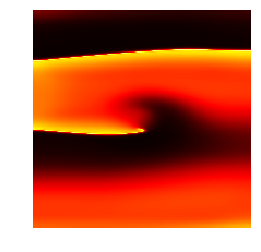

In [11]:
sess.saveAnimation('./')

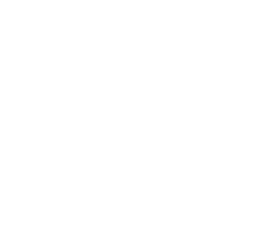

In [7]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())


## 2nd run

In [16]:
del(g)

In [11]:
sim_params['log']['path'] = '/mnt/recordings/SimulationResult/2018-02-01/'
sim_params['restart']['source'] =  '/mnt/recordings/SimulationResult/2018-02-01/'
sim_params['restart']['count'] = 150
sim_params['time']['end'] = 1000
print json.dumps(sim_params, indent=4)

{
    "cell_type": "mahajan", 
    "log": {
        "path": "/mnt/recordings/SimulationResult/2018-02-01/", 
        "cnt": 1000
    }, 
    "stimulation": {
        "extracellular": [], 
        "membrane": []
    }, 
    "time": {
        "end": 1000, 
        "udt": 0.001
    }, 
    "geometory": {
        "width": 200, 
        "ds": 0.015, 
        "height": 200
    }, 
    "restart": {
        "count": 150, 
        "source": "/mnt/recordings/SimulationResult/2018-02-01/"
    }
}


In [13]:
g = elp.sim_generator(sim_params)

In [14]:
out = []
while True:
    img = g.next()
    if img is False: break
    out.append(np.copy(img))

elecpy simulation start!
Stimulation settings ...done
Allocating data... ...done
Initializing data... ...done
Building PDE system ... ...done
Main loop start!
------------------0.0ms
------------------1.0ms
------------------2.0ms
------------------3.0ms
------------------4.0ms
------------------5.0ms
------------------6.0ms
------------------7.0ms
------------------8.0ms
------------------9.0ms
------------------10.0ms
------------------11.0ms
------------------12.0ms
------------------13.0ms


KeyboardInterrupt: 

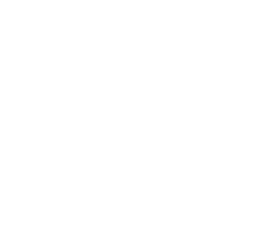

In [22]:
fig = plt.figure()
plt.axis('off')

ims = []
for img in out:
    im = plt.imshow(
        img.reshape(200,200),
        vmin = -100.0, vmax = 20.0,
        cmap=bipolar(neutral=0, lutsize=1024),
        interpolation='nearest')
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims)
#ani.save('anim.gif', writer="imagemagick")
#ani.save('anim.mp4', writer="ffmpeg")
#plt.show()

HTML(ani.to_html5_video())
